# Proyecto Machine Learning

1. Nombre: Rafael
1. Apellido: Contreras
1. Correo: rcontreraspimentel@gmail.com
1. Cedula: 30391915
--------
1. Nombre: Juan
1. Apellido: Fernandez
1. Correo: juuanfz@gmail.com
1. Cedula:
--------

## Problema planteado

En el ámbito de la salud, el diagnóstico asistido por inteligencia artificial ha demostrado ser una herramienta invaluable. Modelos basados en redes neuronales convolucionales (CNN) pueden analizar imágenes médicas como radiografías o resonancias magnéticas para detectar enfermedades con alta precisión. Sin embargo, un problema crítico surge cuando los pacientes deben enviar sus imágenes médicas a servidores en la nube para ser procesadas por estos modelos.

El principal riesgo es la privacidad de los datos: las imágenes médicas contienen información altamente sensible que, en manos equivocadas, podría ser utilizada de manera indebida. Además, muchas regulaciones (como el GDPR en Europa o HIPAA en EE.UU.) exigen que los datos personales sean protegidos rigurosamente.

## Solucion - Intro

Aqui debe explicarse en alto nivel como funciona el ciclo de desarrollo de un modelo de ML que use cifrado homomorfico. No debe irse mucho a los detalles

## Cifrado homomorfico

El cifrado homomórfico permite realizar operaciones en datos cifrados, de modo que los resultados, una vez descifrados, son equivalentes a los que se obtendrían al operar sobre los datos en claro. En el caso de las CNN, se requiere implementar operaciones sobre matrices y convoluciones en el dominio cifrado, lo cual es computacionalmente costoso pero posible con técnicas optimizadas.

El uso de cifrado homomórfico en CNN para diagnóstico médico puede ser usado para mantener la privacidad de los usuarios al enviar imagenes sensibles para los mismos.

#### Esquema de cifrado - LWE

SOURCES

- https://www.youtube.com/watch?v=K026C5YaB3A&t=312s&ab_channel=ChalkTalk

- https://docs.zama.ai/tfhe-rs/get-started/security_and_cryptography





En el resto del notebook puede que nos refiramos a este esquema como LWE.

El esquema Learning With Errors (LWE) es un problema criptográfico. Su seguridad se fundamenta en la dificultad de resolver sistemas de ecuaciones lineales cuando se introduce un pequeño error aleatorio en los coeficientes.

Se tiene que generar una clave clave publica formada por el par $(A,b)$ y una clave privada llamada s, la dificultad del problema viene dada al tratar de encontrar s dado el par $(A,b)$. Todas las operaciones se realizan modulo $q$. Se tienen las siguientes definiciones:

Se genera de forma aleatoria la matriz $ A $. $\mathbb{Z}^n_q$ se refiere al conjunto de n numeros $\{0,1,...,q-1\}$.

$ A_{ij} ∈ Z_q^n $

Se genera un vector "ruido" de forma aleatoria

$ e ∈ \{0, -1, 1\} $

$ b_i = A_i*s + e_i $

Un texto cifrado LWE es una colección de números enteros sin signo de 32 o 64 bits. Antes de cifrar un mensaje en un texto cifrado LWE, primero debe codificarlo como texto simple desplazando el mensaje a los bits más significativos del tipo de número entero sin signo utilizado.

Luego, se agrega un pequeño valor aleatorio llamado ruido a los bits menos significativos. Este ruido es crucial para garantizar la seguridad del texto cifrado. Todas estas operaciones ocurren mod N, siendo N un numero muy grande.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*PnY6RmElCuXyPcQFv_2WBw.png" width="45%">

#### Codificado del mensaje

Tomaremos los "mensajes" como numeros que van de $[-c,c)$. El valor de m es uno de los parametros al momento de implementar LWE. Para esta seccion usaremos $c=4$ para facilitar la explicacion.

Entonces $m=i2^{29}$ donde $i ∈ [-4,4)$. Primero tenemos que $\mathbb{Z}_q = \{0,1,...q\}$ lo cual puede ser representado por enteros de 32 bits $[-2^{31}, 2^{31})$. Los valores de m se muestran como puntos azules.


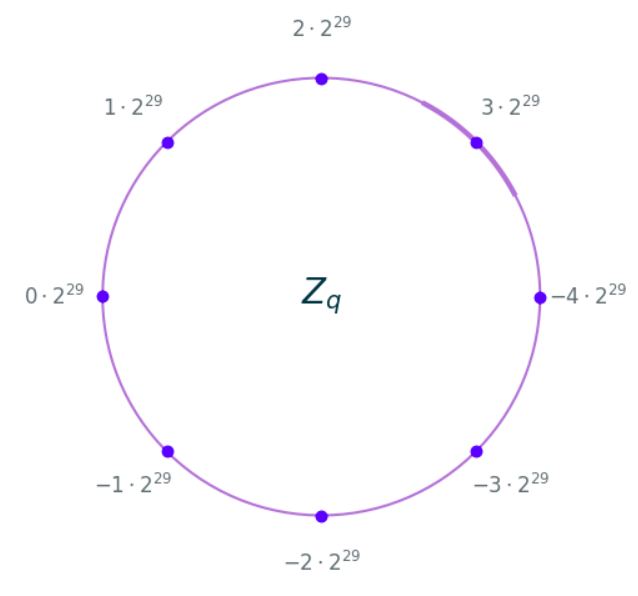

Ahora tendremos dos funciones de codificacion y decodificacion de mensajes:

$$
Encode(m): \mathbb{Z}_8 ->\mathbb{Z}_q
$$
$$
Encode(m) = m * 2^{29}
$$
$$
Decode(k): \mathbb{Z}_q ->\mathbb{Z}_8
$$
$$
Decode(k) = \lfloor k * 2^{-29} \rceil
$$

Decode movera el mensaje recibido al punto azul mas cercano.


#### Cifrado y descifrado

**Cifrado**

Tendremos un mensaje m que sera un vector de bits de tamano n. La llave de encriptado es un vector binarios $s$ de tamano aleatorio.

El encriptado de un numero $ m ∈ \mathbb{Z}_q $ es hecho **escogiendo una fila random** $a$ de $A$ y un elemento de ruido $e_i ∈ \mathbb{Z}_q$. Luego definiendo la funcion de cifrado como:

$$
Enc(x) = (a,a*s+m+e) = (v,w)
$$

**Descifrado**

El descifrado de $(v,w)$ es 0 si $ w - v*s $ esta mas cerca de 0 que de $ 1/2 $ y es 1 en caso contrario.

$$
Dec(v,w) = w - v*s = a*s+m+e - a*s
$$

$$
Dec(v,w) = m + e
$$

Notamos que el resultado del descifrado es m + e. Este valor no es el mensaje buscado. Sin embargo, solo es necesario aplicar la funcion de decodificacion que definimos antes.

$$
Decode(m + e) = m
$$

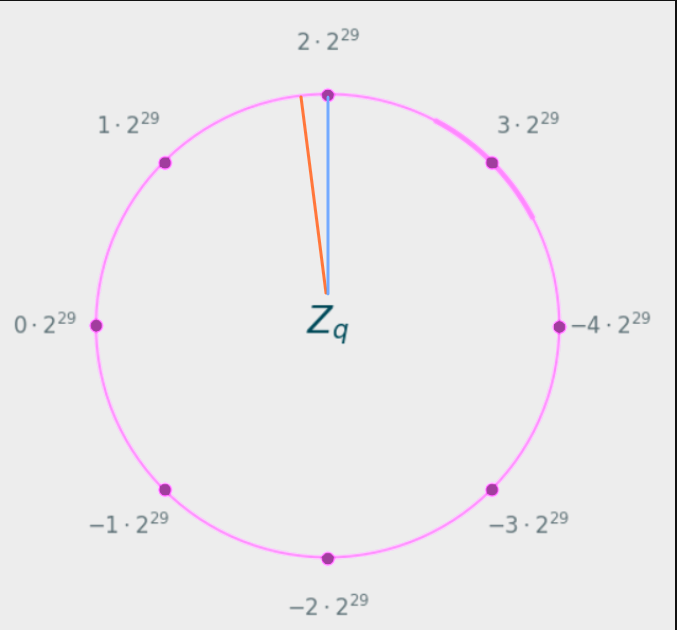

#### Operaciones en espacio encriptado (homomorfismo)

Las librerias que usaremos para lograr realizar operaciones con input encriptado usan una combinacion de distintos cifrados (texto cifrado) de LWE, estos incluyen:

- RLWE: similar a LWE pero usando anillos de polinomios

- GLWE: una generalizacion para el cifrado LWE y RLWE.

- GGSW: una generalizacion para cifrado RGSW.

- GLev: un tipo de texto cifrado intermedio durante operaciones.

El objetivo de este notebook no es ir en detalle sobre estos esquemas, asi que solo dejaremos referencias sobre los mismos:

- https://www.zama.ai/post/tfhe-deep-dive-part-1
- https://docs.zama.ai/tfhe-rs/get-started/security_and_cryptography
- https://www.daniellowengrub.com/blog/2024/01/03/fully-homomorphic-encryption




Ahora explicaremos una version de encryptado homomorfico mas sencilla de entender y practica para la intencion de este notebook. Demostraremos como el esquema de cifrado y descifrado nos permite tener las siguientes propiedades en la suma y multiplicacion:

$
Encrypt(m_1) + Encrypt(m_2) = cyphertext_{sum}
$

$
Decrypt(cyphertext_{sum}) = m_1 + m_2
$

Tenemos que $c ∈ Z_q $

$
Encrypt(m_1) * c = cyphertext_{mul}
$

$
Decrypt(cyphertext_{mul} ) = m_1 * c
$


Ya con esto podremos tener una solucion para el escenario donde un servidor que corre una funcion de regresion lineal de la forma:

$$
 f(x) = \sum_i^n{x_i * \alpha_i}
$$

No es confiable y debemos enviar el input $x$ de forma cifrada.

Suma:

- $
Decrypt(cyphertext_{sum}) = Decrypt(a_1 + a_2, b_1 + b_2) = (b_1 + b_2) - (a_1 + a_2)*s = (b_1 - a_1*s) + (b_2 -a_2*s) =
$
- $
Decrypt(cypbertext_1) + Decrypt(cyphertext_2) = m_1 + m_2
$

Multiplicacion por un escalar:

- $
Decrypt(cyphertext_{mul}) = Decrypt(v*c, w*c) = w*c - v*c*s =
$
- $
Decrypt(cyphertext_{mul}) = c*(w-v*s) =  c*(m_1 + e) = c*m_1
$


## Datos

Debido al tipo de problema que queremos resolver, se usara el siguiente dataset

In [ ]:
!pip install kaggle
!pip install pillow

In [2]:
import kagglehub
import os

SEED = 30391915 + 28447019

# Download latest version
path = kagglehub.dataset_download("subirbiswas19/skin-disease-dataset")

In [3]:
from PIL import Image
import numpy as np
import os

train_path, test_path = path + '/skin-disease-datasaet/train_set', path + '/skin-disease-datasaet/test_set'
img_size = (30,30)

def load_data(path):
    img_paths = os.listdir(path)
    class_cnt = 0
    X = []  # Definimos X para almacenar las imágenes
    Y = []  # Definimos Y para almacenar las etiquetas

    for img_class in img_paths:
        cur_path = path + '/' + img_class
        image_paths = os.listdir(cur_path)
        for img_path in image_paths:
            image = Image.open(f'{cur_path}/{img_path}').resize(img_size)
            # Convertir imagen a formato (canales, alto, ancho)
            X.append(np.transpose(np.array(image), (2, 0, 1)))  # Usamos X aquí
            Y.append(class_cnt)
        class_cnt += 1

    # Prealocar memoria para las listas X y Y
    X_res = np.empty((len(X), X[0].shape[0], X[0].shape[1], X[0].shape[2]), dtype=np.uint8)
    Y_res = np.empty(len(Y), dtype=np.uint8)

    for i in range(len(X)):
        X_res[i] = X[i]
        Y_res[i] = Y[i]

    return X_res, Y_res

# Llamar a la función para cargar los datos
x_train, y_train = load_data(train_path)
x_test, y_test = load_data(test_path)

# Normalizamos las imágenes
x_train = x_train / 255
x_test = x_test / 255

# Mostrar dimensiones de la primera imagen de prueba y la 120
print("Dimensiones de las imágenes de prueba:")
print(x_test[0].shape, x_test[120].shape)

Dimensiones de las imágenes de prueba:
(3, 30, 30) (3, 30, 30)


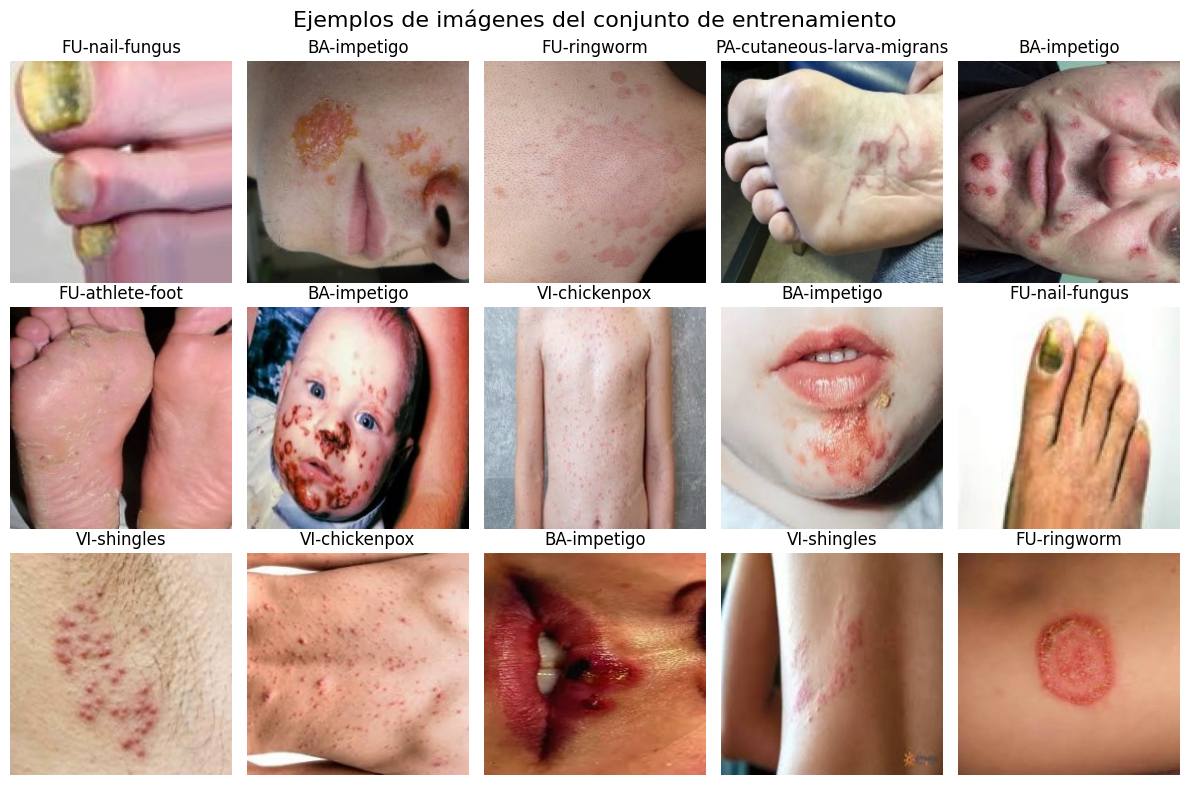

In [36]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Obtener las clases
classes = os.listdir(train_path)
n_classes = len(classes)

# Mostrar algunas imágenes de entrenamiento con sus etiquetas
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.suptitle("Ejemplos de imágenes del conjunto de entrenamiento", fontsize=16)

for ax in axes.ravel():
    class_name = random.choice(classes)
    class_path = os.path.join(train_path, class_name)
    img_name = random.choice(os.listdir(class_path))
    img = Image.open(os.path.join(class_path, img_name))

    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis("off")

plt.tight_layout()
plt.show()


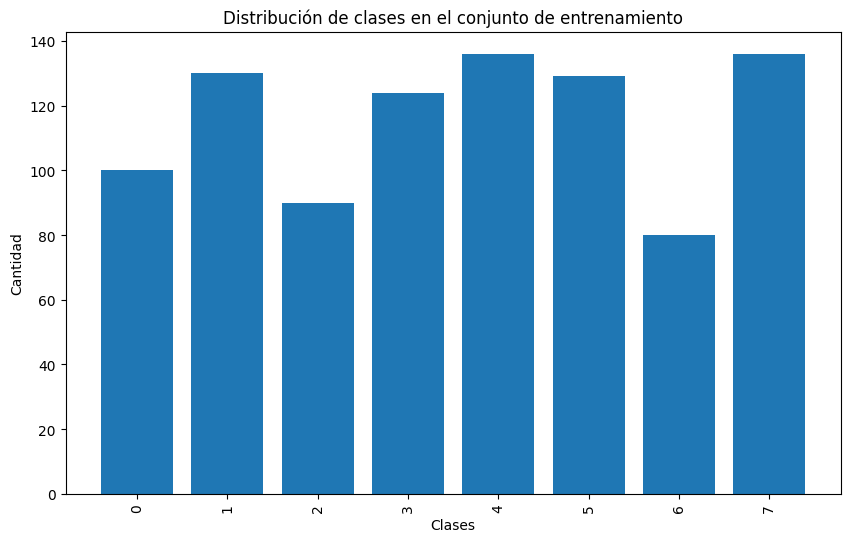

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

# Visualizar distribución de clases
class_counts = Counter(y_train)  # y_train tiene las etiquetas de clase
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()


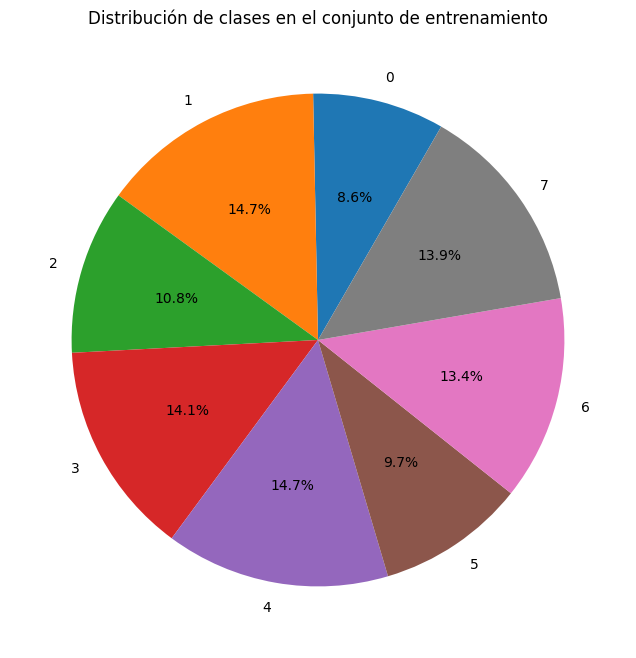

In [ ]:
class_counts = Counter(y_train)
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=60)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.show()

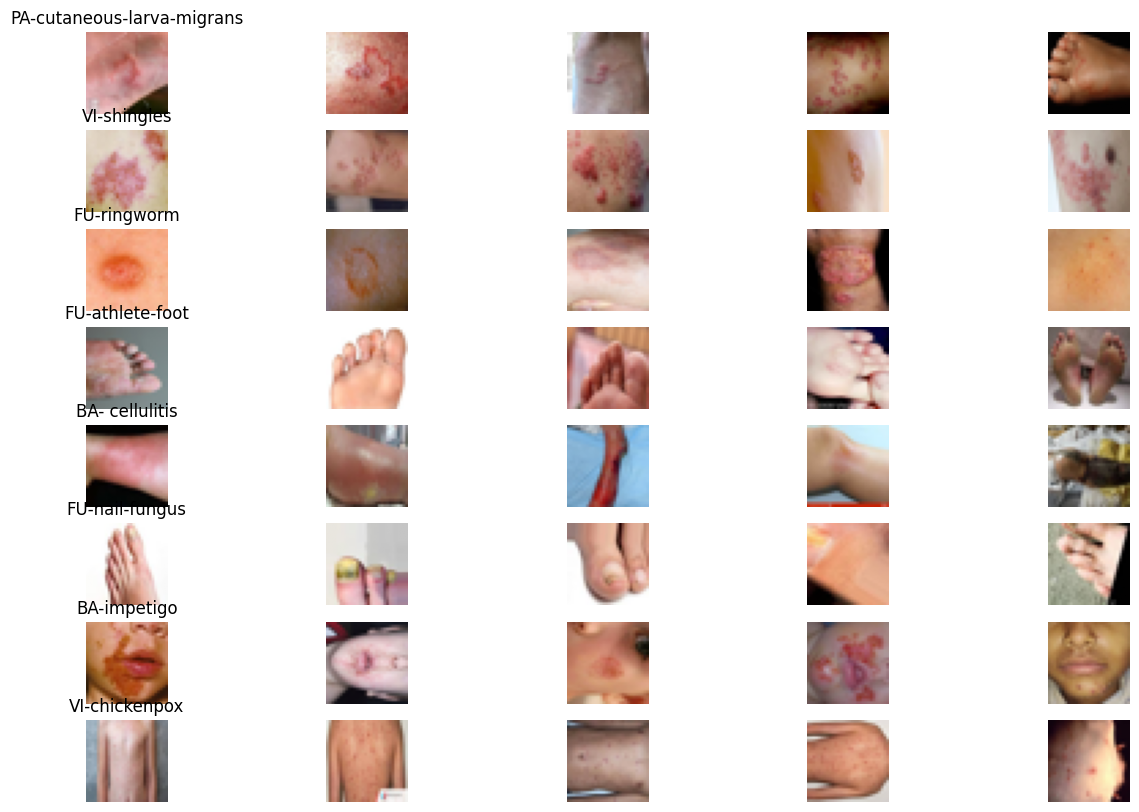

In [6]:
def plot_class_samples(X, Y, class_names, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(len(class_names)):
        class_samples = np.where(Y == i)[0][:num_samples]  # Tomar las primeras 'num_samples' imágenes de cada clase
        for j, sample_idx in enumerate(class_samples):
            plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
            plt.imshow(np.transpose(X[sample_idx], (1, 2, 0)))  # Convertir de (canales, alto, ancho) a (alto, ancho, canales)
            plt.axis('off')
            if j == 0:
                plt.title(class_names[i])
    plt.show()

# Llamar la función pasando las clases
class_names = os.listdir(train_path)
plot_class_samples(x_train, y_train, class_names)


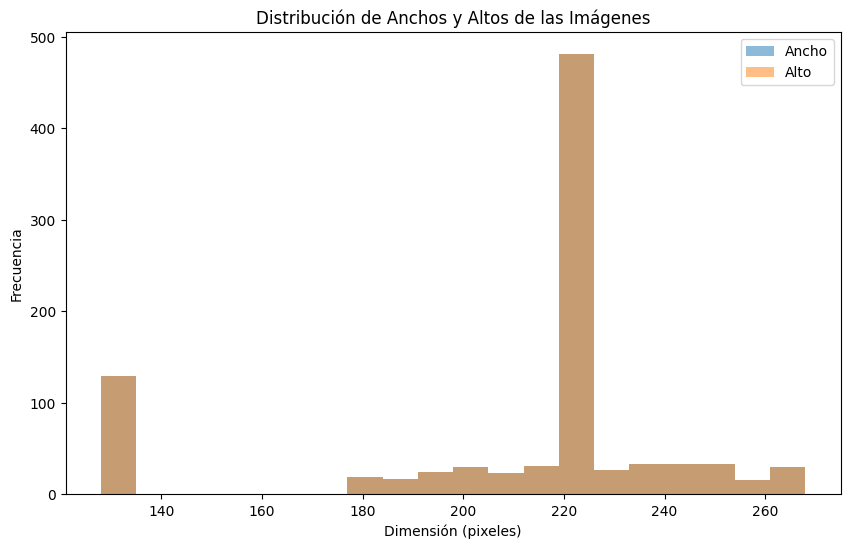

In [7]:
# Obtener el tamaño de cada imagen
sizes = [Image.open(f'{train_path}/{class_name}/{img_name}').size for class_name in os.listdir(train_path) for img_name in os.listdir(f'{train_path}/{class_name}')]

# Extraer el ancho y alto de las tuplas (ancho, alto)
widths, heights = zip(*sizes)

# Graficar distribución de los anchos y altos
plt.figure(figsize=(10, 6))
plt.hist(widths, bins=20, alpha=0.5, label='Ancho')
plt.hist(heights, bins=20, alpha=0.5, label='Alto')
plt.legend()
plt.title("Distribución de Anchos y Altos de las Imágenes")
plt.xlabel("Dimensión (pixeles)")
plt.ylabel("Frecuencia")
plt.show()


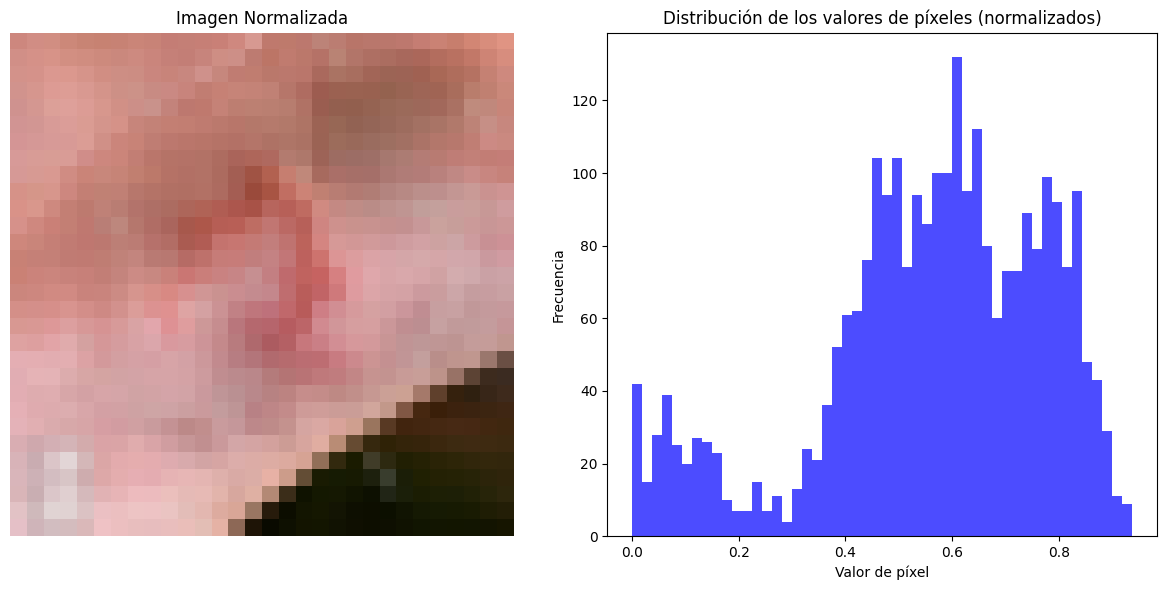

In [8]:
# Graficar los valores de píxeles de una imagen normalizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.transpose(x_train[0], (1, 2, 0)))  # Muestra la segunda imagen
plt.title("Imagen Normalizada")
plt.axis('off')

# Graficar la distribución de los valores de los píxeles
plt.subplot(1, 2, 2)
plt.hist(x_train[0].flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Distribución de los valores de píxeles (normalizados)")
plt.xlabel("Valor de píxel")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [ ]:
#!pip uninstall concrete-python
#!pip install --extra-index-url https://pypi.zama.ai/gpu concrete-python
!pip install concrete-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.6/626.6 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 678.1/678.1 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import time

import numpy as np
import torch
import torch.utils
from concrete.compiler import check_gpu_available
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

from concrete.ml.torch.compile import compile_torch_model

import matplotlib.pyplot as plt

print("gpu available", check_gpu_available())

gpu available False


## Modelado y parametros

Siendo un modelo de clasificacion de imagenes, la solucion propuesta es usar una red convolucional. Ahora hay varias cosas que tomamos en cuenta para este problema:

- Tiempo de entrenamiento
- Uso de ram durante el compilado para el esquema de encriptado
- Tiempo de inferencia normal y con datos encriptados

El modelo de CNN final es el resultado de varias iteraciones, la primera propuesta fue una red mucho mas compleja con varias capas de convolucion y una capa de clasificacion de un tamano considerable (abajo agregaremos una de las versiones anteriores).

El problema principal era el uso de RAM, que sobrepasaba los 15GB (e incluso mas en las primeras versiones que eran mucho mas grandes que la mostrada aqui). La RAM se disparaba cuando se hacia el compilado para convertir el modelo a un circuito aritmetico (mas sobre esto despues).


#### Una de las iteraciones del modelo original

In [ ]:

class CNNnet(torch.nn.Module):
    def __init__(self):
        super(CNNnet,self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(3,8,3,2,1),
            torch.nn.BatchNorm2d(8),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2,2)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(8,16,3,2,1),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(8,8),
            torch.nn.Dropout(0.2)
        )

        self.gap = torch.nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling
        self.mlp1 = torch.nn.Linear(16,8)

    # feedforward
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.gap(x)

        x = self.mlp1(x.view(x.size(0),-1))
        x = self.mlp2(x)
        return x

#### Modelo final

Otro problema que presentamos es la incapacidad de la libreria de convertir ciertas funciones a un circuito aritmetico. Esto es debido a que no tienen soporte para varias operaciones, este problema lo presentamos con "AdaptiveAvgPool2d".

Otro problema presentado era el dataset. Debido a que existian 3 canales y las imagenes tenian un tamano maximo de 224 x 224, esto incrementaba **mucho** el tamano final del modelo. Esto a su vez incrementa el tamano del modelo compilado e incrementa el uso de ram. La decision que tomamos para esto fue reducir las dimensiones de las imagenes hasta el punto que podamos aprender lo suficiente como para mantener el accuracy de mas de 0.7.

Finalmente luego de eliminar complejidad en la estructura de la red y reducir las dimensiones de las imagenes (reduciendo aun mas el tamano de la red), obtuvimos el siguiente modelo.

In [5]:
class CNNnet(nn.Module):
    def __init__(self, n_classes) -> None:
        super().__init__()

        self.conv1 = nn.Conv2d(3, 8, 3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=0)
        self.conv3 = nn.Conv2d(16, 32, 2, stride=1, padding=0)
        self.fc1 = nn.Linear(32*12*12, n_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        return x

Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.35it/s]


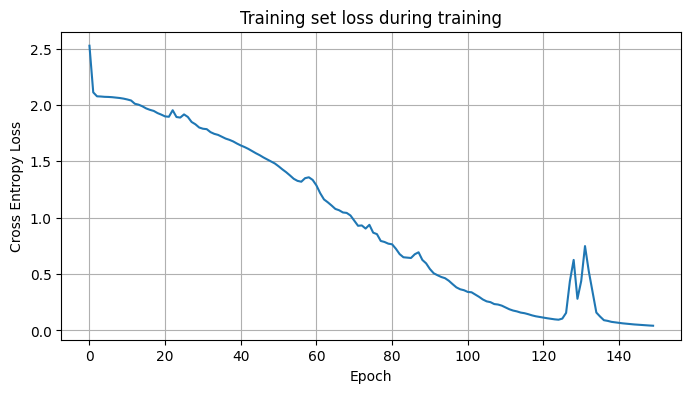

In [6]:
torch.manual_seed(42)

def train_one_epoch(net, optimizer, train_loader):
    # Cross Entropy loss for classification when not using a softmax layer in the network
    loss = nn.CrossEntropyLoss()

    net.train()
    avg_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = net(data)
        loss_net = loss(output, target.long())
        loss_net.backward()
        optimizer.step()
        avg_loss += loss_net.item()

    return avg_loss / len(train_loader)


# Create the tiny CNN with 10 output classes
N_EPOCHS = 150

# Create a train data loader
train_dataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
train_dataloader = DataLoader(train_dataset, batch_size=64)

# Create a test data loader to supply batches for network evaluation (test)
test_dataset = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))
test_dataloader = DataLoader(test_dataset)

# Train the network with Adam, output the test set accuracy every epoch
net = CNNnet(8)
losses_bits = []
optimizer = torch.optim.Adam(net.parameters())
for _ in tqdm(range(N_EPOCHS), desc="Training"):
    losses_bits.append(train_one_epoch(net, optimizer, train_dataloader))

fig = plt.figure(figsize=(8, 4))
plt.plot(losses_bits)
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.title("Training set loss during training")
plt.grid(True)
plt.show()

## Compilado y transformacion del modelo

### Compilado

La compilación de un modelo es necesaria para la evaluacion de datos encriptados con el mismo. El proceso es bastante complejo, sin embargo contiene una serie de pasos fundamentales:

- Define la función: En este caso la funcion en python es la CNN.

- Compilar la función: Se compila la funcion transformandola en un circuito aritmetico. Esto es una representacion de la funcion usando compuertas aritmeticas o booleanas.

- Determinar los hiperparametros para el proceso de encriptado: El compilado a su vez determina los mejores parametros de configuracion para el circuito, un ejemplo es la cantidad de bits para representar los pesos en capas intermedias del circuito.

Como la ejecución de FHE es **mucho** más lenta que la ejecución de datos no cifrados, Concrete ML tiene un modo de simulación que puede ayudar a evaluar rápidamente el impacto de la ejecución de FHE en los modelos. Usaremos este modo de "simulacion" para la seccion de comparacion de modelos.

### Cuantificacion lineal por rangos

https://docs.zama.ai/concrete-ml/explanations/quantization
https://intellabs.github.io/distiller/algo_quantization.html

La cuantificación es el proceso de restringir una entrada de un conjunto continuo o grande de valores (como números reales) a un conjunto discreto (como números enteros). Esto reduce significativamente la cantidad de bits necesarios para los resultados intermedios durante la ejecución de estos modelos de aprendizaje automático. Esto provoca perdida de precision.

Dado que actualmente el esquema de FHE está limitada a números enteros de 16 bits, es necesario cuantificar los modelos para que sean compatibles.


**Fundamentos**

Dejar $[\alpha,\beta]$ sea el rango de un valor a cuantificar donde $\alpha$ es el minimo y $\beta$ es el máximo. Para cuantificar un rango de valores de punto flotante (en R) a valores enteros en $\mathbb{Z}$, el primer paso es elegir el tipo de datos que se va a utilizar. Muchos modelos de ML trabajan con pesos y activaciones representados como números enteros de 8 bits, por lo que este será el valor utilizado en este ejemplo.

Con esto podemos calcular $S$ que es la distancia entre dos valores enteros consecutivos luego de cuantificar:

$$
S = \frac{\beta - \alpha}{2^{norte} - 1}
$$

Donde $2^{norte}-1$ es el numero de valores enteros posibles con la cantidad de bits seleccionada. Basicamente $S$ representa el cambio de valor en cada paso del rango cuantificado.

Para cuantificar un valor de punto flotante $x$ en el rango $[\alpha,\beta]$ se utiliza la siguiente fórmula:

$$
x_{quant} = round(\frac{x-\alpha}{S}) + Z_p
$$

Donde $Z_p$ es el valor entero que representa el 0 en el rango original:

$$
Z_p = round(-\frac{\alpha}{S})
$$

<img src="https://intellabs.github.io/distiller/imgs/quant_sym.png" width="45%"/> <img src="https://intellabs.github.io/distiller/imgs/quant_asym.png" width="45%"/>

Al hacer cualquier inferencia con el modelo, este se encarga de cuantificar el input primero antes de pasarlo por el circuito aritmetico.

In [11]:
n_bits = 6

device = "cuda" if check_gpu_available() else "cpu"
fhe_model = compile_torch_model(net, x_train.astype(float), rounding_threshold_bits=n_bits, p_error=0.1, device=device)

### Uso en produccion

En produccion se tendran clientes y un servidor que se encargue de procesar los datos de usuario. Las librerias que usamos ya nos permiten crear dos objetos que se pueden exportar al cliente y servidor.

Para el cliente se puede generar una llave privada que se usara para encriptar la data de su lado. Luego esto se usara como input para ser procesado por el servidor, este retornara el resultado encriptado para poder ser revelado en el lado del cliente.



<img src="https://docs.zama.ai/~gitbook/image?url=https%3A%2F%2F982026572-files.gitbook.io%2F%7E%2Ffiles%2Fv0%2Fb%2Fgitbook-x-prod.appspot.com%2Fo%2Fspaces%252FVo0VAsu7f5LmyTWU78D1%252Fuploads%252Fgit-blob-f0c968fefec32658440dbc5814e2082b579c6200%252Fconcretemlgraph3.jpg%3Falt%3Dmedia&width=400&dpr=3&quality=100&sign=40aad011&sv=2" width="60%">

In [47]:
# necesario para evitar que falle el codigo abajo
!rm -r ./tmp/fhe_models/*

In [48]:
from concrete.ml.deployment import FHEModelDev, FHEModelClient, FHEModelServer
import numpy as np

# Define the directory for FHE client/server files
fhe_directory = './tmp/fhe_models/'

print("dev model")
# Setup the development environment
dev = FHEModelDev(path_dir=fhe_directory, model=fhe_model)
dev.save()

print("client model")
# Setup the client
client = FHEModelClient(path_dir=fhe_directory, key_dir="/tmp/keys_client")
serialized_evaluation_keys = client.get_serialized_evaluation_keys()

img,target = next(iter(test_dataloader))
encrypted_img = client.quantize_encrypt_serialize(img.numpy())

print("server model")
# Setup the server
server = FHEModelServer(path_dir=fhe_directory)
server.load()


dev model
client model
server model


## Evaluacion

### Metricas del modelo sin FHE

In [ ]:
def test_torch(net, test_loader):
    """Test the network: measure accuracy on the test set."""

    # Freeze normalization layers
    net.eval()

    all_y_pred = np.zeros((len(test_loader)), dtype=np.int64)
    all_targets = np.zeros((len(test_loader)), dtype=np.int64)

    # Iterate over the batches
    idx = 0
    for data, target in test_loader:
        # Accumulate the ground truth labels
        endidx = idx + target.shape[0]
        all_targets[idx:endidx] = target.numpy()

        # Run forward and get the predicted class id
        output = net(data).argmax(1).detach().numpy()
        all_y_pred[idx:endidx] = output

        idx += target.shape[0]

    # Print out the accuracy as a percentage
    n_correct = np.sum(all_targets == all_y_pred)
    print(
        f"Test accuracy for fp32 weights and activations: "
        f"{n_correct / len(test_loader) * 100:.2f}%"
    )


test_torch(net, test_dataloader)

### Metricas del modelo con FHE

Como se habia expresado antes. Las librerias para este modelo tienen un feature que nos permite hacer inferencia con encriptado "simulado". Es decir que se realizan la inferencia sin encriptar los datos, pero con una perdida cercana a la real por el cuantificado de datos, se simula la perdida de precision por usar el circuito aritmetico, etc.

Se usa este metodo para evaluar el performance debido a que la inferencia real con data encriptada tarda **demasiado**. Luego se hara una demostracion de esto

In [27]:
# funcion para evaluar el modelo usando FHE de forma simulada
def test_with_concrete(quantized_module, test_loader):
    # Casting the inputs into int64 is recommended
    all_y_pred = np.zeros((len(test_loader)), dtype=np.int64)
    all_targets = np.zeros((len(test_loader)), dtype=np.int64)

    # Iterate over the test batches and accumulate predictions and ground truth labels in a vector
    idx = 0
    for data, target in tqdm(test_loader):
        data = data.numpy()
        target = target.numpy()

        # Quantize the inputs and cast to appropriate data type
        y_pred = quantized_module.forward(data, fhe="simulate")
        endidx = idx + target.shape[0]

        # Accumulate the ground truth labels
        all_targets[idx:endidx] = target

        # Get the predicted class id and accumulate the predictions
        y_pred = np.argmax(y_pred, axis=1)
        all_y_pred[idx:endidx] = y_pred

        # Update the index
        idx += target.shape[0]

    return all_targets, all_y_pred

In [26]:
y_target,y_pred = test_with_concrete(
    fhe_model,
    test_dataloader
)

  0%|                                                                                                                 | 0/234 [00:00<?, ?it/s]

(1, 3, 30, 30)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(targets, y_pred)
precision = precision_score(targets, y_pred, average='macro')
recall = recall_score(targets, y_pred, average='macro')
f1 = f1_score(targets, y_pred, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1-score: 0.67


TIEMPO DE INFERENCIA

Dado que el modelo que usa FHE tarda mucho mas en hacer las inferencias. Consideramos que es una metrica importante a comparar con un modelo tradicional.

In [ ]:
# Separamos esta seccion dado que la inferencia usando el circuito aritmetico toma tiempo
# Server processes the encrypted data

t = time.time()
encrypted_res = server.run(encrypted_img, serialized_evaluation_keys)
fhe_inference_time = time.time() - t

# Client decrypts the result
result = client.deserialize_decrypt_dequantize(encrypted_res)
print(f"inference result: {result}. expected result: {target}")
print(f"inference time: {fhe_inference_time}")